In [24]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import panel as pn
import plotly.express as px
from pathlib import Path
from panel.interact import interact
from dotenv import load_dotenv
%matplotlib inline

In [25]:
pn.extension("plotly")

In [26]:
import hvplot.pandas

In [27]:
load_dotenv(dotenv_path='C:/Users/saif_/OneDrive/Desktop/APIkeys.env.txt')
map_box_api = os.getenv("map_box_api")

In [28]:
# Read the Mapbox API key
mapbox_token = os.getenv("map_box_api")
type(mapbox_token)

str

In [29]:
# Import the CSVs to Pandas DataFrames
sfo_data_path = Path("C:/Users/saif_/Downloads/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(sfo_data_path, index_col="year")

locations_path = Path("C:/Users/saif_/Downloads/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(locations_path)

In [30]:
figHousingUnits = sfo_data['housing_units'].groupby('year').mean()

salesRent = sfo_data[['sale_price_sqr_foot', 'gross_rent']].groupby('year').mean()

salesRent = sfo_data[['sale_price_sqr_foot', 'gross_rent']].groupby('year').mean()

sfoDF = sfo_data.groupby(['year', 'neighborhood']).mean()

mostExpensive = sfo_data.groupby('neighborhood').mean().sort_values(ascending=False, by='sale_price_sqr_foot')

mostExpensive2 = mostExpensive.reset_index().round(decimals=2)



# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    minUnits = min(figHousingUnits)
    maxUnits = max(figHousingUnits)
    stdUnits = figHousingUnits.std()
    
    housingPlot = plt.bar(
            figHousingUnits.index,
            figHousingUnits,
        )
    plt.ylim(
        (minUnits - stdUnits),
        (maxUnits + stdUnits)
    )
    plt.xlim(
        sfo_data.index[0],
        sfo_data.index[-1]
    )
    plt.suptitle(
        'Housing Units in San Francisco from 2010 to 2016',
        weight='bold'
    )
    plt.xlabel('Year')
    plt.ylabel('Housing Units')
        
    return housingPlot

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    grossRentPlot = plt.plot(
                salesRent.index, 
                salesRent['gross_rent']
            )
    plt.xlim(
        salesRent.index[0],
        salesRent.index[-1]
    )
    plt.suptitle(
        'Average Gross Rent in San Francisco',
        weight='bold'
    )
    plt.xlabel('Year')
    plt.ylabel('Gross Rent')
    
    return grossRentPlot


def average_sales_price():
    """Average Sales Price Per Year."""   
    salesPlot = plt.plot(
        salesRent.index,
        salesRent['sale_price_sqr_foot']
    )
    plt.xlim(
        salesRent.index[0],
        salesRent.index[-1]
    )
    plt.suptitle(
        'Average Sale Price per Square Foot in San Francisco',
        weight='bold')
    plt.xlabel('Year')
    plt.ylabel('Avg. Sale Price')
    
    return salesPlot

def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    priceNeighborhoodPlot = sfoDF['sale_price_sqr_foot'].hvplot(
        xlabel='year',
        ylabel='average sale per square foot',
        label=' ',
        groupby='neighborhood',
        height=500,
        width=700
    )
    
    return priceNeighborhoodPlot

def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""    
    mostExpensivePlot = mostExpensive['sale_price_sqr_foot'].head(10).hvplot.bar(
        ylabel='average sale price per square foot',
        xlabel='neighborhood',
        label='top 10 most expensive neighborhoods',
        rot=40,
        height=400,
        width=650,
    )
    
    return mostExpensivePlot

def parallel_coordinates():
    """Parallel Coordinates Plot."""
    coordinatesPlot = px.parallel_coordinates(
        mostExpensive.head(10),
        color='sale_price_sqr_foot'
    )
    
    return coordinatesPlot

def parallel_categories():
    """Parallel Categories Plot.""" 
    categoriesPlot = px.parallel_categories(
        mostExpensive2.head(10),
        color='sale_price_sqr_foot'
    )
    
    return categoriesPlot

def neighborhood_map():
    """Neighborhood Map"""
    
    neighborhoodCombined = mostExpensive2.join(
        df_neighborhood_locations.set_index('Neighborhood'),
        how='inner',
        on='neighborhood'
    )
    
    neigborhoodPlot = px.scatter_mapbox(
        neighborhoodCombined,
        lat="Lat",
        lon="Lon",
        size="gross_rent",
        color="neighborhood",
        zoom=10,
        title='neighborhoods by gross rent',
        height=800,
        width=1000,
    )
    
    return neigborhoodPlot


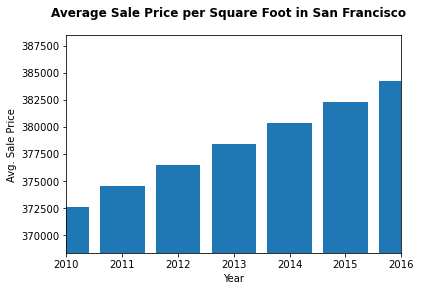

In [31]:
sf_market_plots = pn.Column(
    '## San Francisco housing market overview',
    housing_units_per_year(),
    average_gross_rent(),
    average_sales_price()
)

neighborhood_plots = pn.Column(
    '## San Francisco neighborhoods overview',
    average_price_by_neighborhood(),
    top_most_expensive_neighborhoods(),
    )

parallel_plots = pn.Column(
    '## Parallel plots',
    parallel_categories(),
    parallel_coordinates(),
)

neighborhood_maps = pn.Column(
    '## Neighborhood maps',
    neighborhood_map(),
)

dashboard = pn.Tabs(
    ('Housing market', sf_market_plots),
    ('Neighborhoods', neighborhood_plots),
    ('Parallels', parallel_plots),
    ('Neighborhood maps', neighborhood_maps),
)

In [32]:
dashboard.servable()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Str(BarContainer)
        [2] Str(list)
        [3] Str(list)
    [1] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [2] HoloViews(Bars)
    [2] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
        [2] Plotly(Figure)
    [3] Column
        [0] Markdown(str)
        [1] Plotly(Figure)